In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import calendar
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Dense,GRU
from sklearn.model_selection import train_test_split
from keras import Input 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df1=pd.read_excel("/content/drive/MyDrive/2017_2022.xlsx")
df2021=pd.read_csv("/content/drive/MyDrive/2021.csv")
df2022=pd.read_csv("/content/drive/MyDrive/2022.csv")

In [4]:
df2021

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month,Year
0,Airtel Payments Bank Apps,9.04,2248.49,15.12,5732.09,12,2021
1,Airtel Payments Bank Apps,8.41,1923.95,15.90,5554.63,11,2021
2,Airtel Payments Bank Apps,7.60,1491.34,14.31,4746.79,10,2021
3,Airtel Payments Bank Apps,6.91,1520.92,11.52,3759.12,9,2021
4,Airtel Payments Bank Apps,6.14,1396.65,9.31,2941.88,8,2021
...,...,...,...,...,...,...,...
649,YuvaPay,1.33,60.44,1.33,60.44,6,2021
650,YuvaPay,2.32,73.16,2.32,73.16,5,2021
651,YuvaPay,1.59,51.22,1.59,51.22,4,2021
652,YuvaPay,0.56,18.56,0.56,18.56,3,2021


In [5]:
df1=df1.iloc[::-1]

In [6]:
df1

,Month,No. of Banks live on UPI,Volume (in Mn),Value (in Cr.)
77,2016-04-01,21.0,0.00,0.0
76,2016-05-01,21.0,0.00,0.0
75,2016-06-01,21.0,0.00,0.0
74,2016-07-01,21.0,0.09,0.38
73,2016-08-01,21.0,0.09,3.09
...,...,...,...,...
4,2022-05-01,323.0,5955.20,"10,41,506"
3,2022-06-01,330.0,5862.75,"10,14,384"
2,2022-07-01,338.0,6288.40,"10,62,747"
1,2022-08-01,346.0,6579.63,"10,72,792.68"


In [7]:
df1["year"]=pd.DatetimeIndex(df1["Month"]).year
df1["Month"]=pd.DatetimeIndex(df1["Month"]).month

<ipython-input-7-00115341e0b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["year"]=pd.DatetimeIndex(df1["Month"]).year
<ipython-input-7-00115341e0b9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Month"]=pd.DatetimeIndex(df1["Month"]).month


In [8]:
df1["Month"]

77    4
76    5
75    6
74    7
73    8
     ..
4     5
3     6
2     7
1     8
0     9
Name: Month, Length: 78, dtype: int64

In [9]:
x=dict((index,month) for index, month in enumerate(calendar.month_abbr) if month)
x

{1: 'Jan',
 2: 'Feb',
 3: 'Mar',
 4: 'Apr',
 5: 'May',
 6: 'Jun',
 7: 'Jul',
 8: 'Aug',
 9: 'Sep',
 10: 'Oct',
 11: 'Nov',
 12: 'Dec'}

In [10]:
k=0
for i in range(len(df1["Month"])):
  df1["Month"][i]=x[df1["Month"][i]]
  k+=1

<ipython-input-10-2060c7d7b92d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["Month"][i]=x[df1["Month"][i]]
/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cacher_needs_updating = self._check_is_chained

In [11]:
for i in range(len(df1["Month"])):
  df1["Month"][i]=df1["Month"][i]+str(df1["year"][i])

In [12]:
df1["Month"]

77    Apr2016
76    May2016
75    Jun2016
74    Jul2016
73    Aug2016
       ...   
4     May2022
3     Jun2022
2     Jul2022
1     Aug2022
0     Sep2022
Name: Month, Length: 78, dtype: object

In [13]:
df1['Value (in Cr.)'] = df1['Value (in Cr.)'].str.replace(',', '').astype(float)


<ipython-input-13-feb86839f1b8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Value (in Cr.)'] = df1['Value (in Cr.)'].str.replace(',', '').astype(float)


In [14]:
# df1["Value (in Cr.)"][i]=int(df1["Value (in Cr.)"])

<BarContainer object of 78 artists>

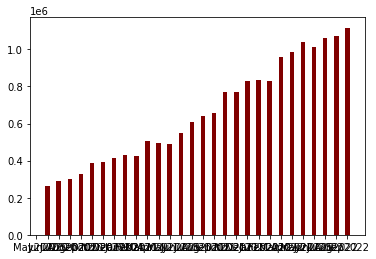

In [15]:
plt.bar(df1["Month"], (df1["Value (in Cr.)"]), color ='maroon',width = 0.4)

In [16]:
x=df1.groupby(["year"],as_index=False).sum()


In [17]:
x

,year,No. of Banks live on UPI,Volume (in Mn),Value (in Cr.)
0,2016,221.0,2.65,0.00
1,2017,626.0,429.15,0.00
2,2018,1291.0,3746.32,0.00
3,2019,1696.0,10787.54,0.00
4,2020,2003.0,18880.89,2372990.23
5,2021,2869.0,38744.55,7159285.80
6,2022,2926.0,51600.12,8910587.82


In [18]:
#df2=df1

In [19]:
#df2["Month"]=[i for i in range(78)]

In [20]:
#df2

In [21]:
#df2

In [22]:
#df2=df2.dropna(subset=["Value (in Cr.)"])
#df2

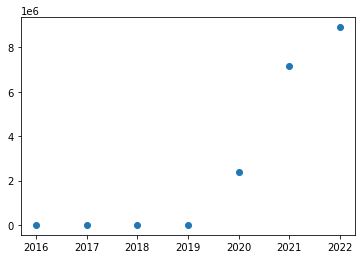

In [23]:
plt.scatter(x["year"],x["Value (in Cr.)"])

([<matplotlib.patches.Wedge at 0x7fb2de9f4f70>,
 [Text(1.1, 0.0, '2016'),
  Text(1.1, 0.0, '2017'),
  Text(1.1, 0.0, '2018'),
  Text(1.1, 0.0, '2019'),
  Text(1.0113505415027548, 0.43263157790675044, '2020'),
  Text(-0.485550998444395, 0.9870360823747283, '2021'),
  Text(0.058217534032060356, -1.0984583372760326, '2022')])

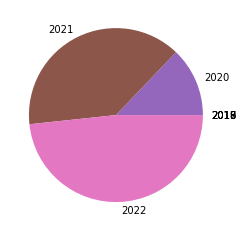

In [24]:
plt.pie(x["Value (in Cr.)"],labels=x["year"])

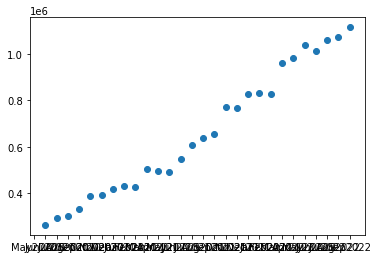

In [25]:
plt.scatter(df1["Month"],df1["Value (in Cr.)"])

In [26]:
y=df2021.groupby(["UPI Banks"],as_index=False).sum()

In [27]:
y=y.sort_values("Value (Cr)").iloc[::-1]

In [28]:
y=y.drop(["Month"],axis=1)
y=y.drop(["Year"],axis=1)

In [29]:
y

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr)
51,PhonePe,17470.81,3365727.16,17470.81,3365727.06
26,Google Pay,13541.88,2737496.81,13541.88,2737496.81
50,Paytm Payments Bank App,4827.38,573899.84,5640.23,669189.79
16,Cred,80.96,97013.60,80.96,97013.60
6,BHIM,289.43,91106.89,289.43,91106.89
...,...,...,...,...,...
56,RealMe,0.04,5.34,0.04,5.34
54,Punjab Sindh Bank App,0.02,5.23,0.02,5.23
25,Goibibo,0.01,2.62,0.01,2.62
41,Khalijeb,0.02,2.49,0.02,2.49


In [30]:
y.iloc[:9]

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr)
51,PhonePe,17470.81,3365727.16,17470.81,3365727.06
26,Google Pay,13541.88,2737496.81,13541.88,2737496.81
50,Paytm Payments Bank App,4827.38,573899.84,5640.23,669189.79
16,Cred,80.96,97013.60,80.96,97013.60
6,BHIM,289.43,91106.89,289.43,91106.89
29,ICICI Bank Apps,191.06,60568.91,227.74,62297.95
67,Yes Bank Apps,292.50,61298.95,293.08,61299.32
3,Amazon Pay,704.15,60962.34,704.15,60962.34
1,Airtel Payments Bank Apps,67.37,13317.81,109.80,40586.97


([<matplotlib.patches.Wedge at 0x7fb2de86bbb0>,
 [Text(1.1, 0.0, '2016'),
  Text(1.1, 0.0, '2017'),
  Text(1.1, 0.0, '2018'),
  Text(1.1, 0.0, '2019'),
  Text(1.0113505415027548, 0.43263157790675044, '2020'),
  Text(-0.485550998444395, 0.9870360823747283, '2021'),
  Text(0.058217534032060356, -1.0984583372760326, '2022')])

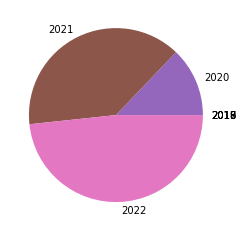

In [31]:
plt.pie(x["Value (in Cr.)"],labels=x["year"])

In [32]:

#x_train, x_test,y_train, y_test = train_test_split(df2["Month"],df2["Value (in Cr.)"],test_size=0.2,random_state=123)

In [33]:
#x_train=pd.DataFrame(x_train)
#y_train=pd.DataFrame(y_train)

In [34]:
#model = Sequential()
#model.add(Input(shape=(1,1), name='Input-Layer'))
#model.add(GRU(128, activation='relu', return_sequences=True))
#model.add(Dropout(0.2))

#model.add(GRU(128, activation='relu'))
#model.add(Dropout(0.1))

#model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.2))

#model.add(Dense(1, activation='sigmoid'))

In [35]:
#opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)

#model.compile(
# loss="sparse_categorical_crossentropy",
#   optimizer=opt,
#   metrics=['accuracy'],
#)


In [36]:
#y_train

In [37]:
#model.fit(x_train,y_train, validation_data=(x_test,y_test),epochs=20)

In [38]:
Banks=df2021.get("UPI Banks")
Value=df2021.get("Value (Cr)")

<BarContainer object of 654 artists>

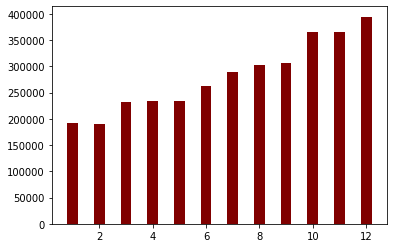

In [39]:
plt.bar(df2021["Month"], (df2021["Value (Cr)"]), color ='maroon',width = 0.4)

In [40]:
x=df2021.groupby(["Month"],as_index=False).sum()

([<matplotlib.patches.Wedge at 0x7fb2de203b80>,
 [Text(1.0806751271243398, 0.20528338855054057, '1'),
  Text(0.9316351535363536, 0.5848554870181992, '2'),
  Text(0.6258776288777537, 0.9045867529819134, '3'),
  Text(0.181585799864009, 1.0849085663260976, '4'),
  Text(-0.2922762200827695, 1.060459622604335, '5'),
  Text(-0.7276015155229636, 0.824982445030612, '6'),
  Text(-1.03512483761242, 0.3721781435789335, '7'),
  Text(-1.07847371452957, -0.21655125737060885, '8'),
  Text(-0.7944065903761337, -0.7608667223416765, '9'),
  Text(-0.19624610337075554, -1.0823527460637752, '10'),
  Text(0.5283400416470664, -0.964809204139542, '11'),
  Text(1.0274476236544703, -0.39287578271863766, '12')])

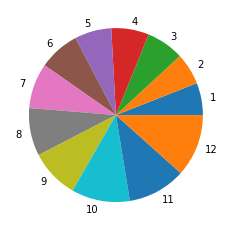

In [41]:
plt.pie(x["Value (Cr)"],labels=x["Month"])

In [42]:
z=df2021.drop(df2021.index[(df2021["Value (Cr)"] <= df2021["Value (Cr)"].mean())],axis=0)


In [43]:
z=z.drop(["Year"],axis=1)

In [44]:
z

,UPI Banks,Volume (Mn) By Costumers,Value (Cr) by Costumers,Volume (Mn),Value (Cr),Month
8,Airtel Payments Bank Apps,3.53,363.66,14.70,11172.43,4
171,Cred,10.36,13817.16,10.36,13817.16,12
172,Cred,9.03,12277.85,9.03,12277.85,11
173,Cred,9.73,12561.25,9.73,12561.25,10
252,Google Pay,1587.43,302989.79,1587.43,302989.79,12
253,Google Pay,1447.84,283357.99,1447.84,283357.99,11
254,Google Pay,1451.93,287491.46,1451.93,287491.46,10
255,Google Pay,1294.56,250393.65,1294.56,250393.65,9
256,Google Pay,1243.75,244453.05,1243.75,244453.05,8
257,Google Pay,1119.16,230847.54,1119.16,230847.54,7


<BarContainer object of 40 artists>

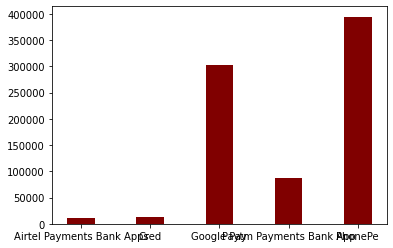

In [45]:
plt.bar(z["UPI Banks"], (z["Value (Cr)"]), color ='maroon',width = 0.4)

In [46]:
Banks=df2022.get("UPI Banks")
Value=df2022.get("Value (Cr)")

<BarContainer object of 452 artists>

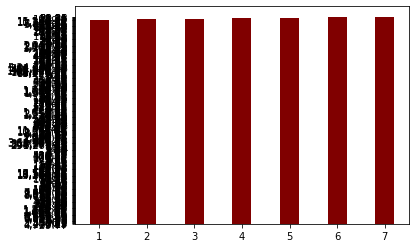

In [47]:
plt.bar(df2022["Month"], (df2022["Value (Cr)"]), color ='maroon',width = 0.4)

In [48]:
df2022

,UPI Banks\n,Volume (Mn) By Costumers\n,Value (Cr) by Costumers\n,Volume (Mn)\n,Value (Cr),Month,Year
0,Airtel Payments Bank Apps,8.53,"2,047.45",13.22,"4,729.77",1,2022
1,Airtel Payments Bank Apps,5.8,"1,199.46",7.58,"2,210.17",2,2022
2,Airtel Payments Bank Apps,8.33,"1,934.41",13.16,"4,492.25",3,2022
3,Airtel Payments Bank Apps,5.29,454.64,5.3,460.9,4,2022
4,Airtel Payments Bank Apps,6.1,486.55,6.11,486.62,5,2022
...,...,...,...,...,...,...,...
447,YuvaPay,0.06,105.39,0.06,105.39,3,2022
448,YuvaPay,0.06,103.34,0.06,103.34,4,2022
449,YuvaPay,0.04,88.95,0.04,88.95,5,2022
450,YuvaPay,0.03,58.31,0.03,58.31,6,2022
